In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from Router import *
from Packet import *
from Network import *
from Plotter import *
from Simulator import *
from utils import *
from Plotter import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


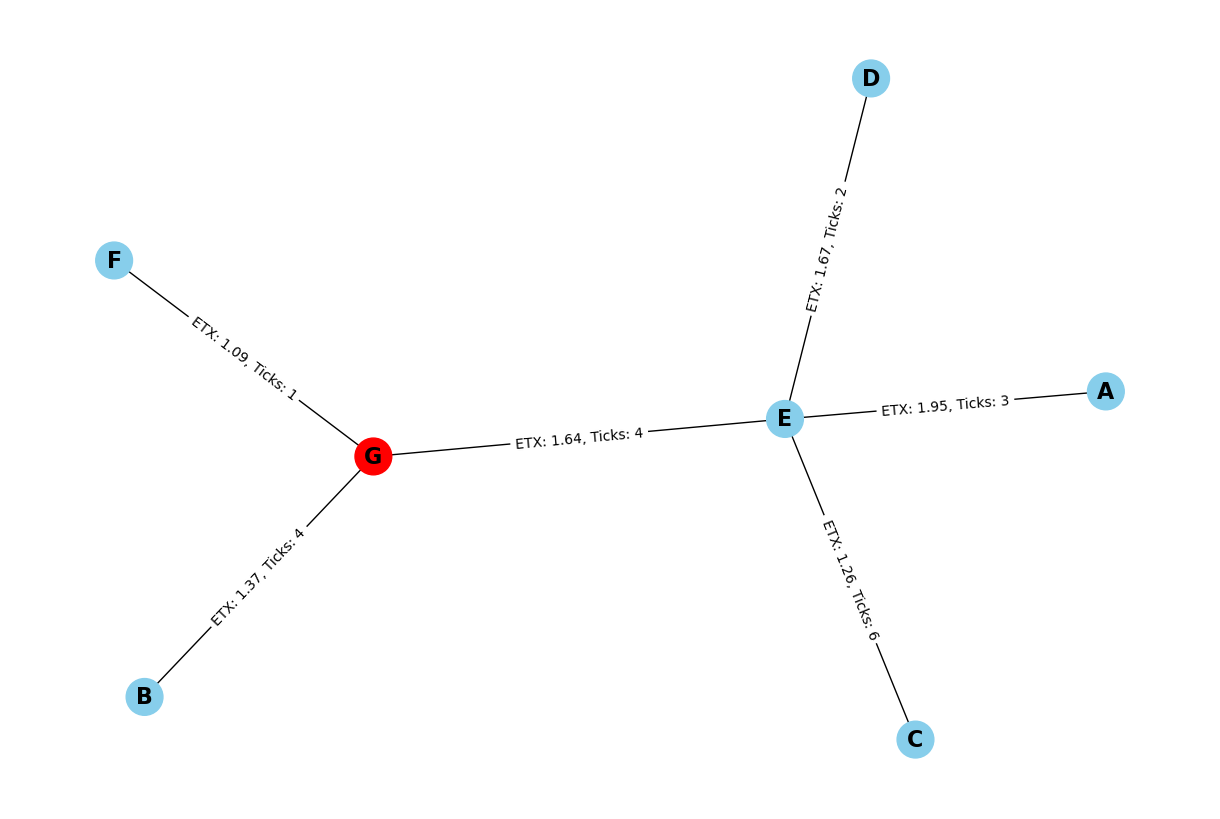

In [2]:
network = Network()
network.generate(7, 0.2)
plot_network(network)

In [ ]:
max_nodes = 10
min_nodes = 4
num_graphs = 20
num_ticks = 1000
settling_ticks = 500

result_dir = "results3/"

set_debug_mode(False)

for N in range(min_nodes, max_nodes+1):
# for N in range(4,5):
    
    for density in [0.3, 0.6, 0.9]:
    # for density in [0.3]:
    
        for iter in range(num_graphs):
            
            results_list = []
            
            network = Network()
            network.generate(N, density)
            
            
            graph_path = result_dir + f"{N}-nodes/{density}-density/"
            png_dir = graph_path + "pngs/"
            if not os.path.exists(png_dir):
                os.makedirs(png_dir, exist_ok=True)
            
            png_file = png_dir + f"iter-{iter}.png"            
            plot_network(network, show=False, filename=png_file)
        
            for queue_type in ["FIFO", "LIFO"]:
            # for queue_type in ["LIFO"]:
                
                for test_type in ["BURSTY", "CONTINUOUS"]:

                    print(f"Running Test: N={N}, density={density}, iter={iter}, queue={queue_type}, test={test_type}")
                    
                    network.burst_on = True
                    network.init_queue_grad()
                    network.add_data(test_type)
                    debugPrint("here")
                    latencies = []
                    pckts_recvd = 0

                    for tick in range(num_ticks+settling_ticks):
                        
                        if tick < num_ticks:

                            network.add_data(test_type, tick, scaling_factor=0.4)
                        
                        pckts_recvd += eval_bcp(network, tick, latencies, queue_type=queue_type)

                    if any(latencies) < 0:
                        raise
                    
                    avg_latency = sum(latencies)/len(latencies)
                    
                    # Store test results and parameters in a dictionary
                    result_dict = {
                        'N': N,
                        'Density': density,
                        'Iteration': iter,
                        'Queue_Type': queue_type,
                        'Test_Type': test_type,
                        'Packets_Received': pckts_recvd,
                        'Average_Latency': avg_latency
                    }
                    # Append the result dictionary to the results list
                    results_list.append(result_dict)
                    
            # Convert results list to DataFrame
            results = pd.DataFrame(results_list)

            csv_dir = graph_path + "csvs/"
            if not os.path.exists(csv_dir):
                os.makedirs(csv_dir, exist_ok=True)
                
            csv_file = csv_dir + f"iter-{iter}.csv"
            results.to_csv(csv_file, index=False)  # index=False to not write row indices

            print(results)  

Iteration: 0
[{'A': [0], 'B': [0, 0], 'C': [0, 0], 'D': [0, 0], 'E': [0], 'F': [0], 'G': []}]
Decision Phase Router: A
Next packet for router to send: Packet(ID: 129, Type: dummy, Progress: 0)
Decision Phase Router: B
Next packet for router to send: Packet(ID: 134, Type: dummy, Progress: 0)
Decision Phase Router: C
Next packet for router to send: Packet(ID: 137, Type: dummy, Progress: 0)
Decision Phase Router: D
Next packet for router to send: Packet(ID: 131, Type: dummy, Progress: 0)
Decision Phase Router: E
Next packet for router to send: Packet(ID: 132, Type: dummy, Progress: 0)
Decision Phase Router: F
Next packet for router to send: Packet(ID: 135, Type: dummy, Progress: 0)
Decision Phase Router: G
Next packet for router to send: None
====


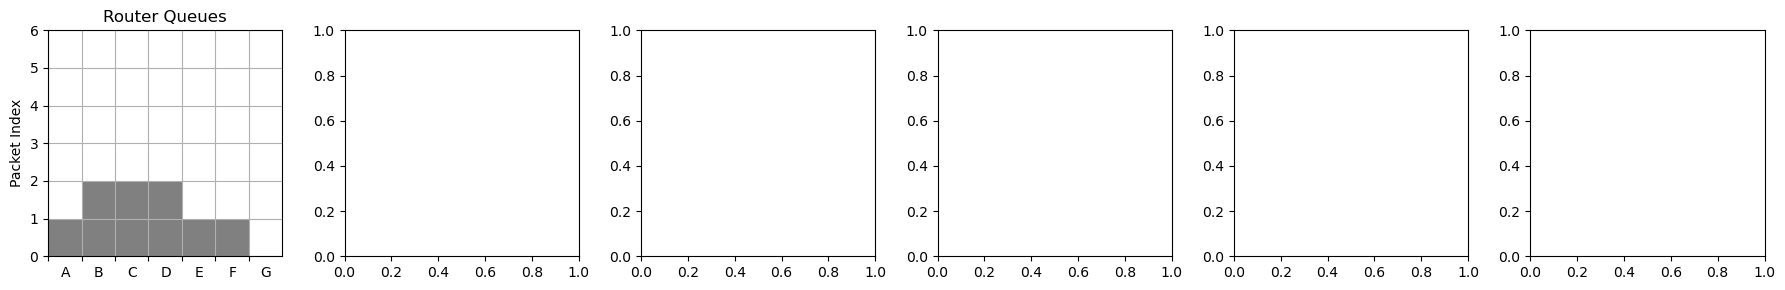

In [67]:
# Code to simulate BCP
all_snapshots = []
num_iters = 1

for iter in range(num_iters):

    print(f"============\nIteration: {iter}\n============")
    
    eval_bcp(network, all_snapshots, queue_type="LIFO", debug=True)

plot_snapshots(all_snapshots)

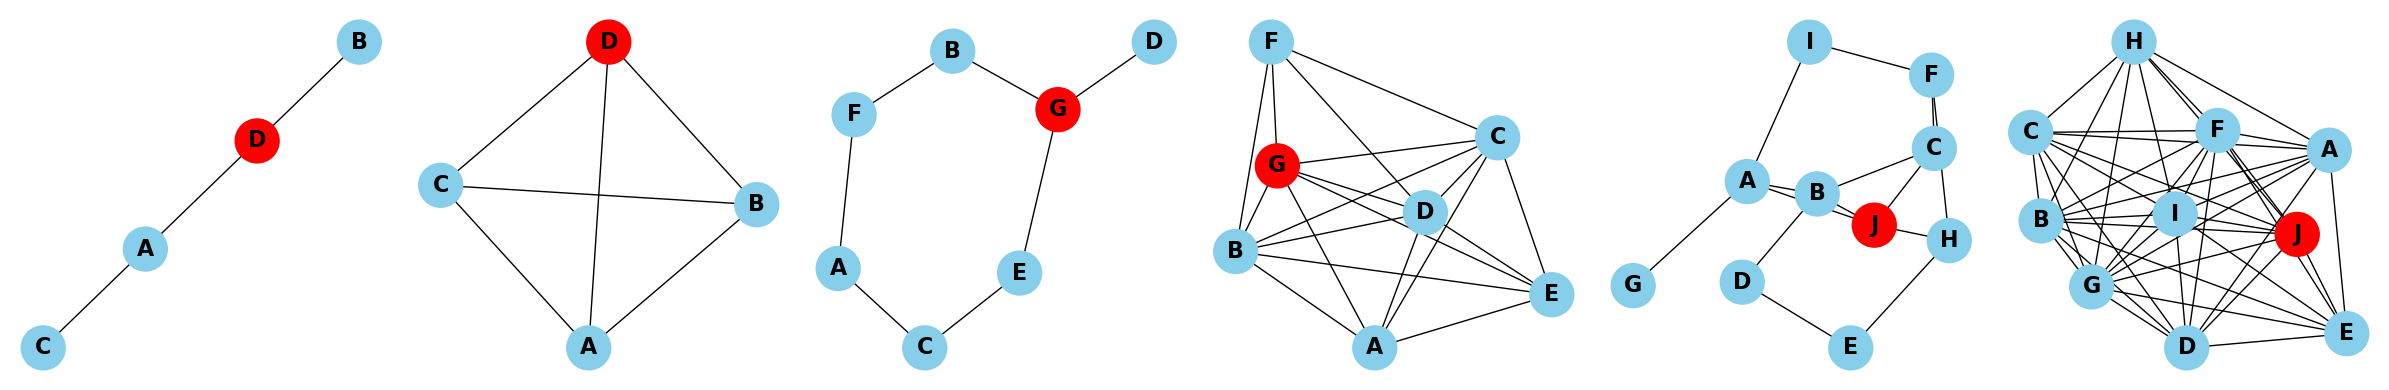

In [17]:
# Generating example networks

max_nodes = 10
min_nodes = 4
num_graphs = 20
num_ticks = 1000
settling_ticks = 500

result_dir = "network_pngs/"

pairs = [(4,0.3), (4,0.9), (7,0.3), (7,0.9), (10,0.3), (10,0.9)]

fig, axs = plt.subplots(1, 6, figsize=(24, 4))  # 6 subplots in one row, adjust figsize as needed

for i, (n, d) in enumerate(pairs):

    network = Network()
    network.generate(n, d)
    
    plot_network_subplot(axs[i], network, n, d)

plt.tight_layout()
plt.show()

    # graph_path = result_dir + f"{n}-nodes/{d}-density/"

    # if not os.path.exists(graph_path):
    #     os.makedirs(graph_path, exist_ok=True)

    # png_file = graph_path + f"iter-{iter}.png"           
    # sub_plot_network(network, show=False, display_weights=False, filename=png_file)
        
        